In [77]:
!gdown https://drive.google.com/uc?id=1iFDq8R2s6vCbZtelhEZZTRskI4SXcibQ

Downloading...
From: https://drive.google.com/uc?id=1iFDq8R2s6vCbZtelhEZZTRskI4SXcibQ
To: /content/products_catalogue.csv
100% 18.6M/18.6M [00:00<00:00, 213MB/s]


# EDA

In [25]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

import seaborn as sns

In [3]:
data = pd.read_csv('products_catalogue.csv', sep=';')

In [4]:
data

,product_id,brand,name,category_id,category,parent_category,parent_parent_category,parent_parent_parent_category
0,242384,teisseire,Boisson aux fruits multivitaminé Teisseire,834,BOISSONS AUX FRUITS PLATES,BRSA NON GAZEUSES,BRSA ET EAUX,LIQUIDES
1,967177,livradois,Chabrol,460,FROMAGES DE SPECIALITE,FROMAGES LS,CREMERIE,FLS
2,967177,livradois,Chabrol IGP,460,FROMAGES DE SPECIALITE,FROMAGES LS,CREMERIE,FLS
3,967269,NaN,Quiche saumon courgettes grillées,511,QUICHE/TARTE SALEE/TOURTE RF,TRAITEUR LS,FRAIS NON LAITIERS LS,FLS
4,968792,pamplie,Beurre extra-fin doux,449,BEURRES,BEURRE OEUFS LAIT,CREMERIE,FLS
...,...,...,...,...,...,...,...,...
153338,26520737,sun,Noisettes décortiquées Bio LES FADAS,414,GRAINES SALEES,PRODUITS APERITIFS,EPICERIE SALEE,EPICERIE
153339,26520740,refs.sans marque,Bière blondes Daytime LAGUNITAS,827,BIERES DE SPECIALITE,BIERES ET PANACHES,BIERES ET CIDRES,LIQUIDES
153340,26520751,juvamine,Complément alimentaire vitamine C 500 LABORATO...,361,PRODUITS SANTE FORME,PARAPHARMACIE,HYGIENE,DPH
153341,26520752,juvamine,Complément alimentaire vitamine C & magnésium ...,361,PRODUITS SANTE FORME,PARAPHARMACIE,HYGIENE,DPH


## Data Understanding
The first step in any AI project is understanding the Data. So that’s what we’ll aim to do here.

In [5]:
print("Shape of data=>",data.shape)

Shape of data=> (153343, 8)


The dataset has about 153343 rows, each containing names, brands, categories and other information for each product. Our objective is to use this data, explore it, and generate insights from it.

Let’s see if there are any null values present in our dataset:




In [6]:
data.isnull().sum()


product_id                          0
brand                            1038
name                                0
category_id                         0
category                            0
parent_category                     0
parent_parent_category              0
parent_parent_parent_category       0
dtype: int64

There are a few null values in the dataset. So, let’s drop these null values and proceed further:



In [7]:
data.dropna(inplace=True)
data.isnull().sum()

product_id                       0
brand                            0
name                             0
category_id                      0
category                         0
parent_category                  0
parent_parent_category           0
parent_parent_parent_category    0
dtype: int64

In [8]:
print('Number of products =>',len(data['name'].unique()))


Number of products => 97707


## Cleaning Text Data

Generally, text data contains a lot of noise either in the form of symbols or in the form of punctuations and stopwords. Therefore, it becomes necessary to clean the text, not just for making it more understandable but also for getting better insights.

1- Lowercase the text


In [9]:
data['name']=data['name'].apply(lambda x: x.lower())
data['category']=data['category'].apply(lambda x: x.lower())
data['parent_category']=data['parent_category'].apply(lambda x: x.lower())
data['parent_parent_category']=data['parent_parent_category'].apply(lambda x: x.lower())
data['parent_parent_parent_category']=data['parent_parent_parent_category'].apply(lambda x: x.lower())

2- Remove digits and words containing digits

I am doing this because digits and words containing digits do not give much importance to the main words.

In [10]:
data['name']=data['name'].apply(lambda x: re.sub('\w*\d\w*','', x))

3- Remove Punctuations

In [11]:
data['name']=data['name'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

4- Remove extra spaces

In [12]:
data['name']=data['name'].apply(lambda x: re.sub(' +',' ',x))

In [13]:
data['name'].unique()

array(['boisson aux fruits multivitaminé teisseire', 'chabrol',
       'chabrol igp', ..., 'bière blondes daytime lagunitas',
       'complément alimentaire vitamine c laboratoires juvamine',
       'complément alimentaire vitamine c magnésium laboratoires juvamine'],
      dtype=object)

In [14]:
for index,text in enumerate(data['name'][10:20]):
  print('name %d:\n'%(index+1),text)

name 1:
 champagne rosé hubert de claminger
name 2:
 champagne rosé hubert de claminger
name 3:
 champagne rosé hubert de claminger
name 4:
 salade piémontaise
name 5:
 salade piémontaise
name 6:
 peigne antistatic glamour studio
name 7:
 peigne antistatic glamour studio
name 8:
 peigne antistatic glamour studio
name 9:
 peigne antistatic glamour studio
name 10:
 fromage blanc moulé à la louche


5- Stopwords Removal & Lemmatization

We’ll use SpaCy for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python and Cython.

In [15]:
# Importing spacy
!python3 -m spacy download fr_core_news_sm
import spacy
from spacy.lang.fr.examples import sentences 

# Loading model
nlp = spacy.load('fr_core_news_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
data['name']=data['name'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

2023-03-22 22:59:32.596027: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 22:59:33.480546: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-22 22:59:33.480653: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-22 22:59:33.480676: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In [16]:
for index,text in enumerate(data['name'][10:20]):
  print('name %d:\n'%(index+1),text)

name 1:
 champagne roser hubert claminger
name 2:
 champagne roser hubert claminger
name 3:
 champagne roser hubert claminger
name 4:
 salad piémontais
name 5:
 salad piémontais
name 6:
 peindre antistatic glamour studio
name 7:
 peindre antistatic glamour studio
name 8:
 peindre antistatic glamour studio
name 9:
 peindre antistatic glamour studio
name 10:
 fromage blanc mouler louche


**---> save cleaned Data**

In [ ]:
data.to_csv('cleanData.csv',index=False)

## Data exploration

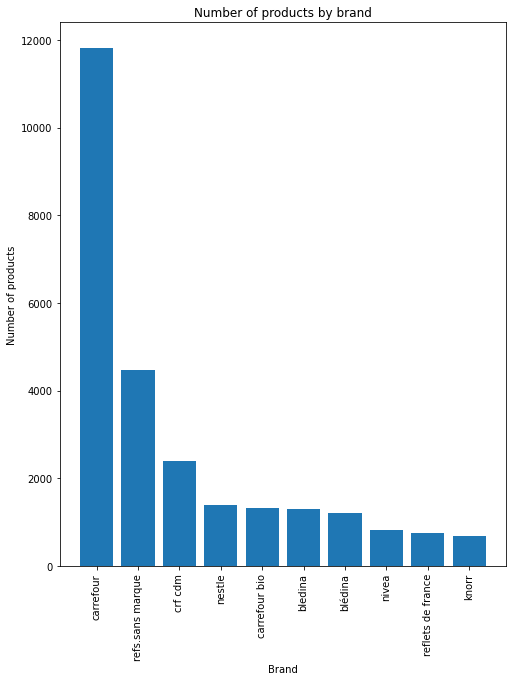

In [29]:
# Plot the number of products by 10 most frequent brand
brands = data["brand"].value_counts().head(10)
plt.figure(figsize=(8,10))
plt.bar(brands.index, brands.values)
plt.xticks(rotation=90)
plt.title("Number of products by brand")
plt.xlabel("Brand")
plt.ylabel("Number of products")
plt.show()


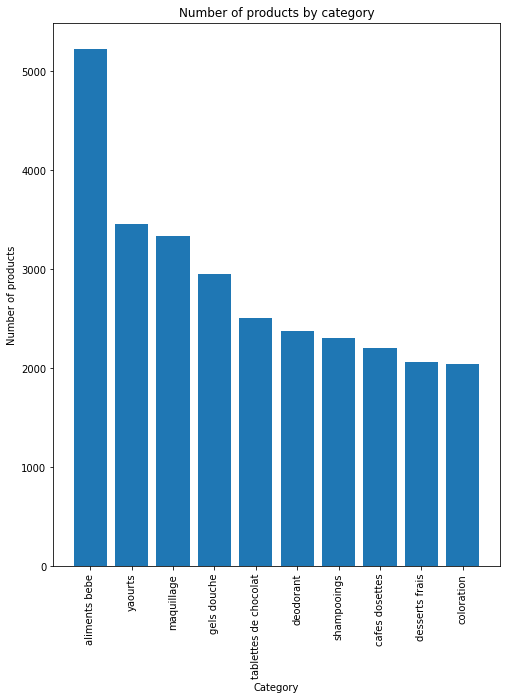

In [30]:
# Plot the number of products by 10 most frequent category
categories = data["category"].value_counts().head(10)
plt.figure(figsize=(8,10))
plt.bar(categories.index, categories.values)
plt.xticks(rotation=90)
plt.title("Number of products by category")
plt.xlabel("Category")
plt.ylabel("Number of products")
plt.show()


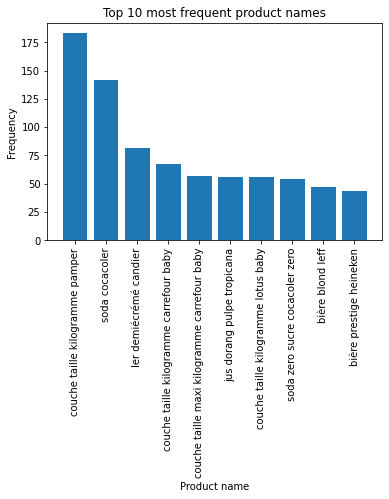

In [22]:
# Plot the top 10 most frequent product names
product_names = data["name"].value_counts().head(10)
plt.bar(product_names.index, product_names.values)
plt.title("Top 10 most frequent product names")
plt.xlabel("Product name")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Create a bar plot of the number of products by brand and category
brand_category_counts = data.groupby(["brand", "category"]).size().reset_index(name="count")
sns.barplot(data=brand_category_counts, x="brand", y="count", hue="category")
plt.title("Number of products by brand and category")
plt.xlabel("Brand")
plt.ylabel("Number of products")
plt.xticks(rotation=90)
plt.show()

# Semantic Similarity Scoring System

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from scipy import spatial
import nltk
nltk.download('punkt')

In [34]:
def compute_similarity(model, product_name1, product_name2):
    """
    Computes the cosine similarity between the embeddings of two product names using a pre-trained Word2Vec model.
    """
    # Tokenize the product names
    tokens1 = word_tokenize(product_name1)
    tokens2 = word_tokenize(product_name2)
    
    # Compute the embeddings for each product name
    embeddings1 = []
    for token in tokens1:
        if token in model.wv:
            embeddings1.append(model.wv[token])
    if not embeddings1:
        return 0.0
    embeddings1 = np.mean(embeddings1, axis=0)
    
    embeddings2 = []
    for token in tokens2:
        if token in model.wv:
            embeddings2.append(model.wv[token])
    if not embeddings2:
        return 0.0
    embeddings2 = np.mean(embeddings2, axis=0)
    
    # Compute the cosine similarity between the embeddings
    similarity = 1 - spatial.distance.cosine(embeddings1, embeddings2)
    
    return similarity

In [42]:
def get_similar_products(product_name, n):
    # Compute the semantic similarity between the given product name and all other product names
    similarities = []
    for name in data['name']:
        similarity = compute_similarity(model, product_name, name)
        similarities.append(similarity)
    
    # Sort the products by semantic similarity
    data['similarity'] = similarities
    df_sorted = data.sort_values(by='similarity', ascending=False)
    
    # Get the n most and least similar products
    most_similar = df_sorted.head(n)[['name', 'brand', 'category', 'similarity']]
    least_similar = df_sorted.tail(n)[['name', 'brand', 'category', 'similarity']]
    
    return most_similar, least_similar

In [40]:
# Tokenize the product names
tokenized_names = data['name'].apply(word_tokenize)

# Train a Word2Vec model on the tokenized product names
model = Word2Vec(tokenized_names,min_count=1, workers=4)

In [99]:
# Test the function with a sample product name and n
# Importing spacy
import spacy
from spacy.lang.fr.examples import sentences 

# Loading model
nlp = spacy.load('fr_core_news_sm',disable=['parser', 'ner'])

#params
product_name = 'Boisson aux fruits multivitaminé Teisseire'
n = 5

#cleaning
product_name=product_name.lower()
product_name=re.sub('\w*\d\w*','', product_name)
product_name=re.sub('[%s]' % re.escape(string.punctuation), '', product_name)
product_name=re.sub(' +',' ',product_name)
# Lemmatization with stopwords removal
product_name = ' '.join([token.lemma_ for token in list(nlp(product_name)) if (token.is_stop==False)])

most_similar, least_similar = get_similar_products(product_name, n)

# Output the results
print(f'The {n} most similar products to "{product_name}" are:')
print(most_similar)
print()
print(f'The {n} least similar products to "{product_name}" are:')
print(least_similar)

The 5 most similar products to "boisson fruit multivitaminer teisseir" are:
                                         name        brand  \
0       boisson fruit multivitaminer teisseir    teisseire   
66834           boisson fruit pommepoir oasis        oasis   
146314          boisson fruit pommepoir oasis        oasis   
66833           boisson fruit pommepoir oasis        oasis   
35164            boisson grenadin fruit shoot  fruit shoot   

                          category  similarity  
0       boissons aux fruits plates    1.000000  
66834   boissons aux fruits plates    0.997166  
146314  boissons aux fruits plates    0.997166  
66833   boissons aux fruits plates    0.997166  
35164   boissons aux fruits plates    0.996542  

The 5 least similar products to "boisson fruit multivitaminer teisseir" are:
                                     name             brand  \
105382    pinceau kabuki glamour institut  glamour institut   
105383    pinceau kabuki glamour institut  glamour in

**---> Save the model**

In [57]:
model.save("word2vec.model")

# implementation of the product-level Git repository

In [115]:
%%writefile input_cleaning.py
# Importing spacy
import spacy
from spacy.lang.fr.examples import sentences
# For regular expressions
import re
# For handling string
import string

# Loading model
nlp = spacy.load('fr_core_news_sm',disable=['parser', 'ner'])

def input_cleaning(product_name):
  #cleaning
  product_name=product_name.lower()
  product_name=re.sub('\w*\d\w*','', product_name)
  product_name=re.sub('[%s]' % re.escape(string.punctuation), '', product_name)
  product_name=re.sub(' +',' ',product_name)
  # Lemmatization with stopwords removal
  product_name = ' '.join([token.lemma_ for token in list(nlp(product_name)) if (token.is_stop==False)])
  return product_name

Writing input_cleaning.py


In [117]:
%%writefile compute_similarity.py

import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from scipy import spatial
import nltk
nltk.download('punkt')

def compute_similarity(model, product_name1, product_name2):
    """
    Computes the cosine similarity between the embeddings of two product names using a pre-trained Word2Vec model.
    """
    # Tokenize the product names
    tokens1 = word_tokenize(product_name1)
    tokens2 = word_tokenize(product_name2)
    
    # Compute the embeddings for each product name
    embeddings1 = []
    for token in tokens1:
        if token in model.wv:
            embeddings1.append(model.wv[token])
    if not embeddings1:
        return 0.0
    embeddings1 = np.mean(embeddings1, axis=0)
    
    embeddings2 = []
    for token in tokens2:
        if token in model.wv:
            embeddings2.append(model.wv[token])
    if not embeddings2:
        return 0.0
    embeddings2 = np.mean(embeddings2, axis=0)
    
    # Compute the cosine similarity between the embeddings
    similarity = 1 - spatial.distance.cosine(embeddings1, embeddings2)
    
    return similarity

Writing compute_similarity.py


In [106]:
%%writefile get_similar_products.py

import pandas as pd
from gensim.models import Word2Vec
from compute_similarity import compute_similarity

# Load the product metadata CSV file
data = pd.read_csv('data/cleanData.csv')

# Load the model
model = Word2Vec.load("models/word2vec.model")

def get_similar_products(product_name, n):
    # Compute the semantic similarity between the given product name and all other product names
    similarities = []
    for name in data['name']:
        similarity = compute_similarity(model, product_name, name)
        similarities.append(similarity)
    
    # Sort the products by semantic similarity
    data['similarity'] = similarities
    df_sorted = data.sort_values(by='similarity', ascending=False)
    
    # Get the n most and least similar products
    most_similar = df_sorted.head(n)[['name', 'brand', 'category', 'similarity']]
    least_similar = df_sorted.tail(n)[['name', 'brand', 'category', 'similarity']]
    
    return most_similar, least_similar

Writing get_similar_products.py


In [107]:
%%writefile train.py

import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Load the product metadata CSV file
data = pd.read_csv('data/cleanData.csv')

# Tokenize the product names
tokenized_names = data['name'].apply(word_tokenize)

# Train a Word2Vec model on the tokenized product names
model = Word2Vec(tokenized_names,min_count=1, workers=4)

model.save("models/word2vec.model")

Writing train.py


In [110]:
%%writefile app.py

import argparse
from get_similar_products import get_similar_products
from input_cleaning import input_cleaning

if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Find similar products')
    parser.add_argument('product_name', type=str, help='Name of the product')
    parser.add_argument('num_similar', type=int, help='Number of similar products to retrieve')
    args = parser.parse_args()

    product_name = input_cleaning(args.product_name)
    num_similar = args.num_similar

    most_similar, least_similar = get_similar_products(product_name, num_similar)

    # Output the results
    print(f'The {num_similar} most similar products to "{product_name}" are:')
    print(most_similar)
    print()
    print(f'The {num_similar} least similar products to "{product_name}" are:')
    print(least_similar)


Writing app.py


In [112]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [113]:
!python train.py

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [118]:
!python app.py "Boisson aux fruits multivitaminé Teisseire" 5

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2023-03-23 01:37:09.701398: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-23 01:37:09.701527: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-03-23 01:37:09.701547: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
The 5 most similar products to "boisson fruit multivitam

In [103]:
!pip freeze > requirements.txt 